Sešit pro prozkoumávání prvních vyfiltrovaných dat z České národní bibliografie.

In [39]:
import os
import re
import sys
import json
import pandas as pd

In [40]:
pd.set_option('display.max_columns', 1000)

In [41]:
df = pd.read_json('data_raw/ceska_beletrie_raw.json')
df = df[df['041_ind1'] != 1]
df = df.reindex(sorted(df.columns), axis=1)
cizojazycne = df[(df['041_a'].notnull()) & (df['041_a'] != 'cze')]

C:\Users\micha\AppData\Local\Temp\ipykernel_1380\4060468971.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df = pd.read_json('data_raw/ceska_beletrie_raw.json')
C:\Users\micha\AppData\Local\Temp\ipykernel_1380\4060468971.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df = pd.read_json('data_raw/ceska_beletrie_raw.json')
C:\Users\micha\AppData\Local\Temp\ipykernel_1380\4060468971.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is depreca

C:\Users\micha\AppData\Local\Temp\ipykernel_1380\2051427318.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  sample = pd.read_json("data_raw/cnb_sample.json")
C:\Users\micha\AppData\Local\Temp\ipykernel_1380\2051427318.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  sample = pd.read_json("data_raw/cnb_sample.json")
C:\Users\micha\AppData\Local\Temp\ipykernel_1380\2051427318.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In 

124000

In [44]:
testy = pd.read_json("data_raw/testy.json")

C:\Users\micha\AppData\Local\Temp\ipykernel_1380\3342864631.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  testy = pd.read_json("data_raw/testy.json")
C:\Users\micha\AppData\Local\Temp\ipykernel_1380\3342864631.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  testy = pd.read_json("data_raw/testy.json")
C:\Users\micha\AppData\Local\Temp\ipykernel_1380\3342864631.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future ver

In [45]:
len(df)

75337

In [ ]:
def najdi_rok(pole008, c260, c264):
    if " xr" in pole008:
        try:
            vysledek = int(pole008.split(' xr')[0].strip()[-4:])
            return vysledek
        except:
            pass
    retezec = str([c260, c264])
    try:
        vysledek = int(re.search(r'\d{4}',retezec).group())
        print(f"{retezec}, {vysledek}")
        return vysledek
    except:
        return None

In [47]:
df['rok'] = df.apply(lambda row: najdi_rok(row['008'], row['260_c'], row['264_c']), axis=1)

830321s1983    xr a         u0|0   cze, 1983
830405s1982    xr a          0|0 1 cze, 1982
830405s1982    xr a          0|0 1 cze, 1982
830224s1982    xr           u0|0 | cze, 1982
830211s1982    xr           u0|0 | cze, 1982
830401s1982    xr a         u0|0 | cze, 1982
830217s1983    xr           u0|0   cze, 1983
830217s1983    xr           u0|0   cze, 1983
830401s1982    xr a         u0|0   cze, 1982
830401s1983    xr a         u0|0 | cze, 1983
830219s1983    xr a          0|0 1 cze, 1983
830426s1982    xr a         u0|0   cze, 1982
830315s1982    xr a          0|0 1 cze, 1982
830225s1982    xr           u0|0   cze, 1982
830214s1982    xr a   e      000 1 cze, 1982
830406s1982    xr ac         000 1 cze, 1982
830331s1982    xr a          0|0 1 cze, 1982
830401s1982    xr     e |   u000 f cze, 1982
830211s1983    xr a   j |   u000 f cze, 1983
830223s1983    xr     e     u000 f cze, 1983
830218s1983    xr a   d     u000 f cze, 1983
830223s1982    xr a   j |   u0|0 f cze, 1982
830223s198

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [48]:
df[(df['072_a'] == "821.162.3-3") & (df['rok'] == 2024) & ((df['250_a'].str.lower().str.contains('první',na=False)) | (df['250_a'].str.lower().str.contains('1. vyd',na=False)))][['100_a','245_a']]

100_a                                             245_a
72187       Ludvík, Ludvík      Moje bývalá, budoucí, nastávající minulost /
73680       Kohout, Pavel,                                    Taková láska :
74047     Glockner, David,                            Vraždy na Grabštejně /
74244               Eloise                                  Moderní gigolo /
74303       Klouda, Filip,                                 Neonová cizinka /
...                    ...                                               ...
76423        Pražák, Jiří,  Trampův deník: Konec srandy, potkal jsem dívku /
76427       Domská, Marie,                                Skryté ultimátum :
76428         Kausc, Emma,                                   Narušení děje /
76429     Šulcová, Helena,                             Samé dobré starosti /
76431  Christovová, Aneta,                          Deník tlustý kočičandy /

[366 rows x 2 columns]

<Axes: xlabel='rok'>

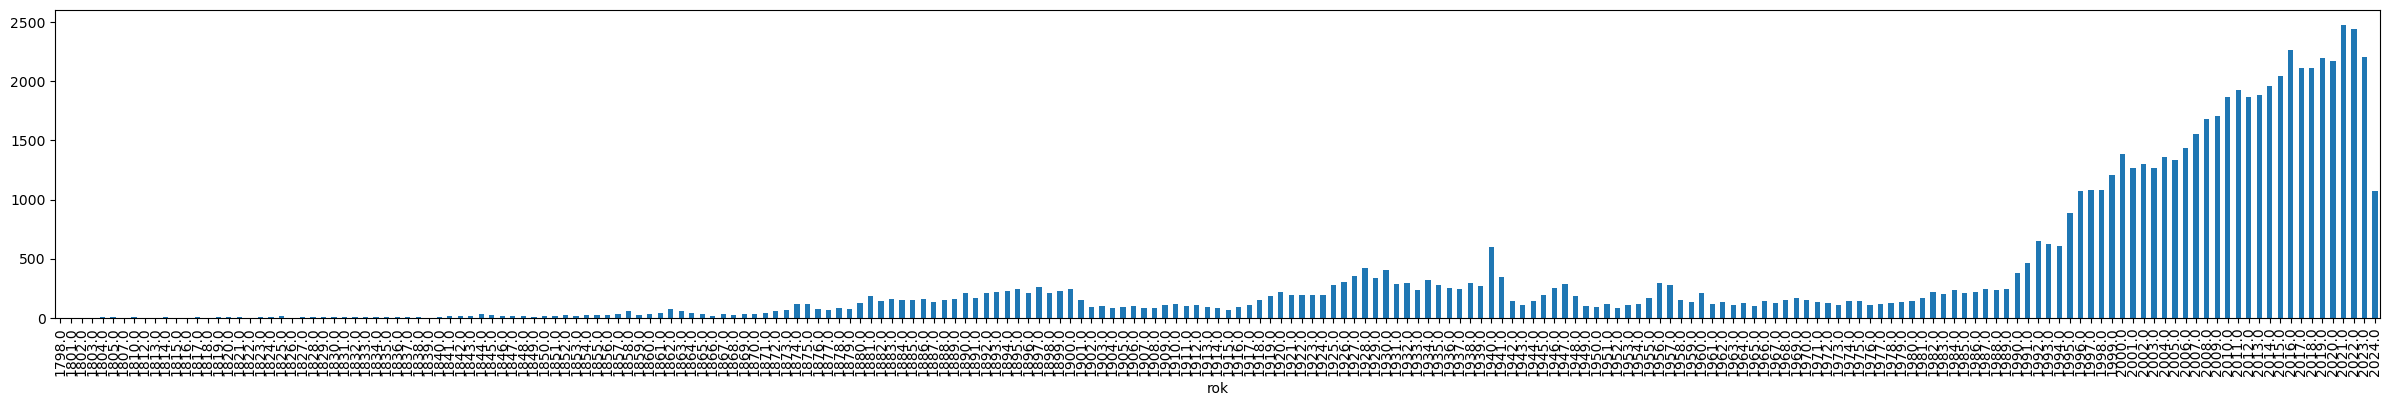

In [49]:
df.groupby('rok').size().plot.bar(figsize=(30,4))

In [50]:
len(df)

75337

In [51]:
df['001'].nunique()

72866

In [52]:
df['005'].nunique()

69351

In [53]:
df['008'].nunique()

60342

In [54]:
df.explode('035_a')['035_a'].nunique()

65092

In [55]:
df['stránek'] = df['300_a'].apply(lambda x: re.search(r'\d{1,4}', str(x)).group(0) if re.search(r'\d{1,4}', str(x)) else None)
df['stránek'] = pd.to_numeric(df['stránek'])

<Axes: ylabel='Frequency'>

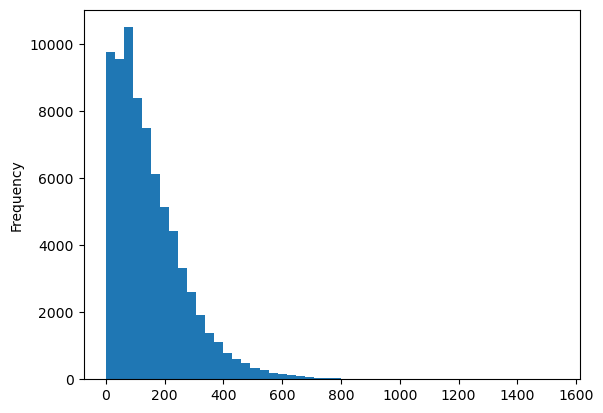

In [66]:
df['stránek'].plot.hist(bins=50)

In [67]:
df[(df['020_q'].str.lower().str.contains('váz',na=False)) | (df['020_q'].str.lower().str.contains('brož',na=False))]

001      003           005  006 007  \
0           ck8300396  CZ PrNK  2.011032e+13  NaN  tu   
1           ck8300397  CZ PrNK  2.019031e+13  NaN  tu   
2           ck8300397  CZ PrNK  2.019031e+13  NaN  tu   
4           ck8300399  CZ PrNK  2.013010e+13  NaN  ta   
5           ck8300400  CZ PrNK  2.013073e+13  NaN  ta   
...               ...      ...           ...  ...  ..   
76428  nkc20243629240  CZ PrNK  2.024091e+13  NaN  ta   
76429  nkc20243629265  CZ PrNK  2.024091e+13  NaN  ta   
76430  nkc20243629294  CZ PrNK  2.024091e+13  NaN  ta   
76431  nkc20243629295  CZ PrNK  2.024091e+13  NaN  ta   
76432  nkc20243631028  CZ PrNK  2.024091e+13  NaN  ta   

                                          008 010_a         015_a 015_z  \
0      830321s1983    xr a         u0|0   cze   NaN  cnb000000415   NaN   
1      830405s1982    xr a          0|0 1 cze   NaN  cnb000000416   NaN   
2      830405s1982    xr a          0|0 1 cze   NaN  cnb000000416   NaN   
4      830211s1982    xr           u0|0 | cze   NaN  cnb000000418   NaN   
5      830401s1982    xr a         u0|0 | cze   NaN  cnb000000419   NaN   
...                                       ...   ...           ...   ...   
76428  240904s2024    xr     g      000 f cze   NaN  cnb003629240   NaN   
76429  240905s2024    xr a   g      000 jacze   NaN  cnb003629265   NaN   
76430  240906s2024    xr a   a      000 j cze   NaN  cnb003629294   NaN   
76431  240906s2024    xr a   g      000 hdcze   NaN  cnb003629295   NaN   
76432  240909s2024    xr a   g      000 1 cze   NaN  cnb003631028   NaN   

                   020_a      020_c            020_q 020_z 022_a 022_z 024_a  \
0                    NaN  Kčs 13,00         (Váz.) :   NaN   NaN   NaN   NaN   
1                    NaN  Kčs 30,00  (Váz. v kůži) :   NaN   NaN   NaN   NaN   
2                    NaN  Kčs 30,00  (Váz. v kůži) :   NaN   NaN   NaN   NaN   
4                    NaN   5,00 Kčs        (Brož.) :   NaN   NaN   NaN   NaN   
5                    NaN     23 Kčs         (Váz.) :   NaN   NaN   NaN   NaN   
...                  ...        ...              ...   ...   ...   ...   ...   
76428  978-80-275-2196-8        NaN      (brožováno)   NaN   NaN   NaN   NaN   
76429  978-80-7683-603-7  Kč 349,00       (vázáno) :   NaN   NaN   NaN   NaN   
76430  978-80-00-07474-0  Kč 329,00       (vázáno) :   NaN   NaN   NaN   NaN   
76431  978-80-7683-605-1  Kč 369,00       (vázáno) :   NaN   NaN   NaN   NaN   
76432  978-80-7551-355-7        NaN      (brožováno)   NaN   NaN   NaN   NaN   

      024_ind1  024_ind2 024_q  024_z 028_a 028_b 028_ind1 028_ind2 028_q  \
0          NaN       NaN   NaN    NaN   NaN   NaN      NaN      NaN   NaN   
1          NaN       NaN   NaN    NaN   NaN   NaN      NaN      NaN   NaN   
2          NaN       NaN   NaN    NaN   NaN   NaN      NaN      NaN   NaN   
4          NaN       NaN   NaN    NaN   NaN   NaN      NaN      NaN   NaN   
5          NaN       NaN   NaN    NaN   NaN   NaN      NaN      NaN   NaN   
...        ...       ...   ...    ...   ...   ...      ...      ...   ...   
76428      NaN       NaN   NaN    NaN   NaN   NaN      NaN      NaN   NaN   
76429      NaN       NaN   NaN    NaN   NaN   NaN      NaN      NaN   NaN   
76430      NaN       NaN   NaN    NaN   NaN   NaN      NaN      NaN   NaN   
76431      NaN       NaN   NaN    NaN   NaN   NaN      NaN      NaN   NaN   
76432      NaN       NaN   NaN    NaN   NaN   NaN      NaN      NaN   NaN   

                 035_a  040_9   040_a 040_b   040_c   040_d 040_e 041_a 041_b  \
0       (OCoLC)9715869    NaN  ABA001   cze     NaN  ABA001   NaN   NaN   NaN   
1      (OCoLC)23564107    NaN  ABA001   cze     NaN  ABA001   NaN   NaN   NaN   
2      (OCoLC)23564107    NaN  ABA001   cze     NaN  ABA001   NaN   NaN   NaN   
4      (OCoLC)39567086    NaN  ABA001   cze     NaN  ABA001   NaN   NaN   NaN   
5      (OCoLC)10562431    NaN  ABA001   cze  ABA001  ABA001   NaN   NaN   NaN   
...                ...    ...     ...   ...     ...     ... 

In [68]:
df.drop_duplicates(subset=['245_a'])

001      003           005  006 007  \
0           ck8300396  CZ PrNK  2.011032e+13  NaN  tu   
1           ck8300397  CZ PrNK  2.019031e+13  NaN  tu   
3           ck8300398  CZ PrNK  2.015102e+13  NaN  tu   
4           ck8300399  CZ PrNK  2.013010e+13  NaN  ta   
5           ck8300400  CZ PrNK  2.013073e+13  NaN  ta   
...               ...      ...           ...  ...  ..   
76427  nkc20243629208  CZ PrNK  2.024091e+13  NaN  ta   
76428  nkc20243629240  CZ PrNK  2.024091e+13  NaN  ta   
76429  nkc20243629265  CZ PrNK  2.024091e+13  NaN  ta   
76431  nkc20243629295  CZ PrNK  2.024091e+13  NaN  ta   
76432  nkc20243631028  CZ PrNK  2.024091e+13  NaN  ta   

                                          008 010_a         015_a  \
0      830321s1983    xr a         u0|0   cze   NaN  cnb000000415   
1      830405s1982    xr a          0|0 1 cze   NaN  cnb000000416   
3      830224s1982    xr           u0|0 | cze   NaN  cnb000000417   
4      830211s1982    xr           u0|0 | cze   NaN  cnb000000418   
5      830401s1982    xr a         u0|0 | cze   NaN  cnb000000419   
...                                       ...   ...           ...   
76427  240904s2024    xr     g      000 f cze   NaN  cnb003629208   
76428  240904s2024    xr     g      000 f cze   NaN  cnb003629240   
76429  240905s2024    xr a   g      000 jacze   NaN  cnb003629265   
76431  240906s2024    xr a   g      000 hdcze   NaN  cnb003629295   
76432  240909s2024    xr a   g      000 1 cze   NaN  cnb003631028   

              015_z              020_a      020_c            020_q 020_z  \
0               NaN                NaN  Kčs 13,00         (Váz.) :   NaN   
1               NaN                NaN  Kčs 30,00  (Váz. v kůži) :   NaN   
3      cnb000135396                NaN        NaN              NaN   NaN   
4               NaN                NaN   5,00 Kčs        (Brož.) :   NaN   
5               NaN                NaN     23 Kčs         (Váz.) :   NaN   
...             ...                ...        ...              ...   ...   
76427           NaN  978-80-275-2147-0        NaN      (brožováno)   NaN   
76428           NaN  978-80-275-2196-8        NaN      (brožováno)   NaN   
76429           NaN  978-80-7683-603-7  Kč 349,00       (vázáno) :   NaN   
76431           NaN  978-80-7683-605-1  Kč 369,00       (vázáno) :   NaN   
76432           NaN  978-80-7551-355-7        NaN      (brožováno)   NaN   

      022_a 022_z 024_a 024_ind1  024_ind2 024_q  024_z 028_a 028_b 028_ind1  \
0       NaN   NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
1       NaN   NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
3       NaN   NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
4       NaN   NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
5       NaN   NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
...     ...   ...   ...      ...       ...   ...    ...   ...   ...      ...   
76427   NaN   NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
76428   NaN   NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
76429   NaN   NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
76431   NaN   NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
76432   NaN   NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   

      028_ind2 028_q            035_a  040_9   040_a 040_b   040_c   040_d  \
0          NaN   NaN   (OCoLC)9715869    NaN  ABA001   cze     NaN  ABA001   
1          NaN   NaN  (OCoLC)23564107    NaN  ABA001   cze     NaN  ABA001   
3          NaN   NaN  (OCoLC)85541906    NaN  ABA001   cze     NaN  ABA001   
4          NaN   NaN  (OCoLC)39567086    NaN  ABA001   cze     NaN  ABA001   
5          NaN   NaN  (OCoLC)10562431    NaN  ABA001   cze  ABA001  ABA001   
...        ...   ...              ...    ...     ...   ...     ...     ...   
76427      NaN   NaN              NaN    NaN  ABG001   cze     NaN     NaN   
76428 

In [69]:
df.groupby('rok').size().head(50)

rok
1798.0     1
1801.0     2
1802.0     2
1803.0     1
1804.0     4
1805.0     4
1807.0     1
1810.0     4
1812.0     2
1813.0     2
1814.0     4
1815.0     2
1816.0     3
1817.0     5
1818.0     3
1819.0     5
1820.0     4
1821.0     9
1822.0     3
1823.0    10
1824.0    12
1825.0    17
1826.0     3
1827.0     5
1828.0     5
1829.0     5
1830.0    12
1831.0     7
1832.0     4
1833.0     4
1834.0     8
1835.0    10
1836.0     8
1837.0     9
1838.0     8
1839.0     3
1840.0     6
1841.0    17
1842.0    13
1843.0    17
1844.0    37
1845.0    25
1846.0    20
1847.0    16
1848.0    13
1849.0    11
1850.0    15
1851.0    16
1852.0    21
1853.0    19
dtype: int64

In [71]:
df.groupby('rok').size().tail(50)

rok
1975.0     147
1976.0     113
1977.0     121
1978.0     123
1979.0     133
1980.0     141
1981.0     166
1982.0     220
1983.0     206
1984.0     239
1985.0     211
1986.0     216
1987.0     241
1988.0     236
1989.0     246
1990.0     379
1991.0     461
1992.0     654
1993.0     624
1994.0     606
1995.0     887
1996.0    1074
1997.0    1082
1998.0    1085
1999.0    1211
2000.0    1386
2001.0    1269
2002.0    1301
2003.0    1271
2004.0    1364
2005.0    1334
2006.0    1437
2007.0    1557
2008.0    1684
2009.0    1703
2010.0    1869
2011.0    1925
2012.0    1871
2013.0    1884
2014.0    1960
2015.0    2045
2016.0    2262
2017.0    2114
2018.0    2109
2019.0    2193
2020.0    2172
2021.0    2479
2022.0    2439
2023.0    2205
2024.0    1073
dtype: int64

In [106]:
df['072_x'].sample(20)

60134                                          Česká próza
68447                                         Česká poezie
73656    [Dějiny Česka a Slovenska, Literatura pro děti...
12861    [Česká próza, Literatura pro děti a mládež (be...
4442                                           Česká próza
28702                                          Česká próza
70631    [Česká poezie, Literatura pro děti a mládež (b...
72190                                         Česká poezie
1508                                                   NaN
51758                                         Česká poezie
43765                                          Česká próza
68423                                         Česká poezie
73579                             [Česká próza, Biografie]
70411    [Česká próza, Literatura pro děti a mládež (be...
58451                                          Česká próza
27784    [Česká próza, Literatura pro děti a mládež (be...
61993    [Česká poezie, Literatura pro děti a mládež (b.

In [178]:
df[df['080_a'] == '885.0-32']

001      003           005  006  007  \
37          ck8300922  CZ PrNK  2.015021e+13  NaN   tu   
57          ck8301406  CZ PrNK  2.009043e+13  NaN   ta   
58          ck8301414  CZ PrNK  2.016102e+13  NaN   tu   
114         ck8302430  CZ PrNK  2.008093e+13  NaN   ta   
278         ck8402094  CZ PrNK  2.015022e+13  NaN   tu   
...               ...      ...           ...  ...  ...   
50484  cpk20142574890  CZ PrNK  2.023120e+13  NaN   ta   
53283  nkc20152719169  CZ PrNK  2.021031e+13  NaN  NaN   
64073  nkc20193158491  CZ PrNK  2.020041e+13  NaN   ta   
73191  cpk20233517780  CZ PrNK  2.023043e+13  NaN   ta   
75223  cpk20243586986  CZ PrNK  2.024020e+13  NaN   ta   

                                          008 010_a         015_a  \
37     830322s1982    xr            0|0 1 cze   NaN  cnb000000940   
57     830321s1983    xr            000 1 cze   NaN  cnb000001425   
58     830613s1982    xr            0|0 1 cze   NaN  cnb000001433   
114    830321s1983    xr           u0|0   cze   NaN  cnb000002449   
278    840608s1984    xr a          0|0 1 cze   NaN  cnb000009483   
...                                       ...   ...           ...   
50484  140319m19231924xr            ||| | cze   NaN  cnb002574890   
53283  010713s1999    xr a          000 0 cze   NaN  cnb002719169   
64073  100611s2008    xr     g      000 j cze   NaN  cnb003158491   
73191  970527s1931    xr     e      000 j cze   NaN  cnb003517780   
75223  041208s2001    xr ag  g      000 j cze   NaN  cnb003586986   

                                                   015_z              020_a  \
37                                                   NaN                NaN   
57                                                   NaN                NaN   
58                                          cnb000128502                NaN   
114                                                  NaN                NaN   
278                                                  NaN                NaN   
...                                                  ...                ...   
50484  [cnb000987021, cnb000987017, cnb001039692, cnb...                NaN   
53283                                                NaN      80-267-0482-7   
64073                                                NaN  978-80-86811-93-2   
73191         [cnb000167691, cnb000550270, cnb000550271]                NaN   
75223                                                NaN                NaN   

           020_c                               020_q          020_z 022_a  \
37     Kčs 18,00                            (Váz.) :            NaN   NaN   
57     Kčs 18,00                            (Váz.) :            NaN   NaN   
58     Kčs 13,00                            (Váz.) :            NaN   NaN   
114    Kčs 19,00                            (Váz.) :            NaN   NaN   
278    Kčs 22,00                            (Váz.) :            NaN   NaN   
...          ...                                 ...            ...   ...   
50484        NaN                                 NaN            NaN   NaN   
53283        NaN       [(v knize neuvedeno ;, váz.)]  80-85872-30-7   NaN   
64073        NaN  [(v knize neuvedeno ;, brožováno)]  80-86811-74-3   NaN   
73191        NaN                              (Váz.)            NaN   NaN   
75223        NaN                              (Váz.)            NaN   NaN   

      022_z 024_a 024_ind1  024_ind2 024_q  024_z 028_a 028_b 028_ind1  \
37      NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
57      NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
58      NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
114     NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
278     NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
...     ...   ...      ...       ...   ...    ...   ...   ...      ...   
50484   NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
53283   NaN   NaN      NaN

In [180]:
vsechny_kody = df[['080_a','100_a','245_a']].explode('080_a')

In [181]:
vsechny_kody.groupby('080_a').size().nlargest(50)

080_a
821.162.3-32       22409
821.162.3-1        19072
821.162.3-31       17082
821-93             12859
(0:82-32)          12617
(0:82-1)           12607
(0:82-31)           6800
821.162.3-3         6701
821.162.3-34        4788
(0:82-3)            3851
(0:82-34)           3470
(437.3)             3058
885.0-1             3005
82-93               2736
929                 2661
(0:82-311.6)        2506
(0:82-312.4)        1974
(0:82-322.4)        1931
(082.21)            1898
(086.76)            1800
(0:82-321.5)        1469
(0:82-4)            1335
(0:82-322.6)        1308
(0.027.6)           1135
885.0-32            1122
885.0-31            1113
(0:82-312.9)        1096
(086.7)08            968
(0:82-321.6)         965
(0:82-193)           823
(086.7.053.2)        771
(0:82-14)            752
(0:82-311.9)         691
(0:82-94)            664
(0:82-311.5)         633
(082)                629
821.162.3-051        626
821.162.3-1-051      619
(0:82-312.6)         588
(0:82-311.3)       

In [182]:
vsechny_kody = df[['080_a',]]

In [183]:
testy['080_a'].astype(str)

0                               ['885.0-252', '885.0-93']
1                                ['885.0-93', '885.0-34']
2               ['821.162.3-32', '(0:82-32)', '(082.21)']
3                                        830(437.1/.2)-32
4                                ['885.0-34', '885.0-93']
                              ...                        
2119                 ['821.112.2(437.3)-32', '(0:82-32)']
2120                 ['821.112.2(437.3)-32', '(0:82-32)']
2121    ['821.112.2(437.3)-051', '913:82', '929', '(43...
2122    ['821.162.3-34', '821-1/-8(0.046.6)', '(0:82-3...
2123                                     830(437.1/.2)-31
Name: 080_a, Length: 2124, dtype: object

In [184]:
df['041_ind1'].drop_duplicates()

0      NaN
105    0.0
Name: 041_ind1, dtype: float64

In [185]:
df['072_x'].drop_duplicates().sample(50)

27953              [Česká literatura, Tisky (19. století)]
41400    [Česká próza, Slovenská literatura, Literatura...
8729                      Literatura různých forem a žánrů
238                                       Česká literatura
75442    [Česká poezie, Sochařství, keramika, porcelán,...
19234    [Zoologie, Literatura pro děti a mládež (belet...
3890                         [Česká poezie, Vokální hudba]
5948     [Literatura pro děti a mládež (o ní), Učební o...
35210    [Vokální hudba, Česká poezie, Literatura pro d...
5626     Náboženství Dálného východu. Indická náboženst...
14484                       [Česká próza, Filozofie ducha]
5103                                                 Hudba
1346                           [České drama, Česká poezie]
51219                            Knihovnictví. Informatika
31533                 [Česká poezie, Slovenská literatura]
15514                           [Zahrádkářství, Biografie]
54413    [Výchova a vzdělávání, Literatura pro děti a m.

In [186]:
df['072_a'].drop_duplicates()

0                                  NaN
1                          821.162.3-1
14                         821.162.3-3
18               [821.162.3-3, 821-93]
23                         821.162.3-2
                     ...              
75157                         [82, 37]
75252                       [614, 929]
75442                [821.162.3-1, 73]
76251                    [792, 821-93]
76411    [741.52, 821.162.3-3, 821-93]
Name: 072_a, Length: 512, dtype: object

In [187]:
df[df['245_a'].str.contains('Miluji svou',na=False)][['rok','100_a','245_a']]

rok          100_a                                      245_a
59406  2017.0  Macl, Ondřej,  Miluji svou babičku víc než mladé dívky /

In [188]:
testy.sample(30)

001      003           005             007  \
1364      bknhak09048  CZ PrNK  2.017103e+13             NaN   
792    cpk19990654121  CZ PrNK  2.023083e+13              tu   
2012   cpz20213304422  CZ PrNK  2.021022e+13  sd fungnnmmned   
907       bk195702530  CZ PrNK  2.021021e+13             NaN   
717   nos190131993002  CZ PrNK  2.000052e+13             NaN   
550       bk192603340  CZ PrNK  2.008070e+13             NaN   
638      nos190131925  CZ PrNK  2.000052e+13             NaN   
1743   cpz20112223750  CZ PrNK  2.012072e+13  sd fsngnnmmned   
1051      bk193603457  CZ PrNK  2.022041e+13             NaN   
1482   nkc20051567535  CZ PrNK  2.008062e+13              ta   
523       bk193102460  CZ PrNK  2.016062e+13              ta   
675      nos190131954  CZ PrNK  2.008070e+13             NaN   
1470      bknvla05480  CZ PrNK  2.010083e+13              ta   
2114   nkc20243614800  CZ PrNK  2.024091e+13              ta   
488       bk192903265  CZ PrNK  1.999111e+13             NaN   
46          ck9201339  CZ PrNK  2.015081e+13              tu   
1421   cpk20031286827  CZ PrNK  2.019081e+13              tu   
1366      bknhak09050  CZ PrNK  2.017103e+13             NaN   
1394      bknhak09114  CZ PrNK  2.023043e+13              ta   
354       bk195803589  CZ PrNK  2.015081e+13              ta   
1379      bknhak09079  CZ PrNK  2.017103e+13              ta   
2120   nkc20243614807  CZ PrNK  2.024081e+13              ta   
741      nos190132017  CZ PrNK  2.016103e+13              ta   
1155      bk193202588  CZ PrNK  2.024072e+13              ta   
966       bk194102272  CZ PrNK  2.008053e+13             NaN   
1442   cpk20041313030  CZ PrNK  2.012122e+13              ta   
2001   nkc20203255283  CZ PrNK  2.021023e+13              ta   
407       bk196600718  CZ PrNK  2.011072e+13             NaN   
1531   nkc20061687931  CZ PrNK  2.010022e+13              ta   
2115   nkc20243614802  CZ PrNK  2.024091e+13              ta   

                                         008         015_a  \
1364  030517s1887    xr     f      ||| 1 cze  cnb001261516   
792   990412s1998    xr a   e      000 j eng  cnb000654121   
2012  210127t20172017xr nnnna       z  n cze  cnb003304422   
907   981030s1957    xr     g      000 f cze  cnb000726199   
717   000517s1919    xr                  cze  cnb000632737   
550   000925s1926    xr                1 cze  cnb000585668   
638   000516s1917    xr                  cze  cnb000632647   
1743  110905s2010    xr nnnng       f  n cze  cnb002223750   
1051  990413s1936    xr            ||| 1 cze  cnb000795554   
1482  050517s2005    xr ach e c    000 0dcze  cnb001567535   
523   991111s1931    xr af         000 1 cze  cnb000548892   
675   000517s1925    xr                  cze  cnb000632686   
1470  041108s1898    xr            000   cze  cnb001515690   
2114  240715t20242024xr a   b      000 j spa  cnb003614800   
488   991110s1929    xr                1 cze  cnb000540656   
46    920519s1991    xr           u0|0 | cze  cnb000065972   
1421  031006s1893    xr     b      000 f cze  cnb001286827   
1366  030517s1887    xr     f      ||| 1 cze  cnb001261518   
1394  030518s1930    xr     f      000 1 eng  cnb001261581   
354   980601s1958    xr            000 1 cze  cnb000450399   
1379  030517s1911    xr     f      000 1dcze  cnb001261546   
2120  240715t20242024xr ach g      000 j ita  cnb003614807   
741   000519s1913    xr a          000 | cze  cnb000632770   
1155  000211s1932    xr            000 1 cze  cnb000937756   
966   990309s1941    xr                  cze  cnb000756264   
1442  040423s1863    xr     e      000 j cze  cnb001313030   
2001  200923q19051907xr a   b      000 f cze  cnb003255283   
407   970821s1966    xr                  cze  cnb000488357   
1531  061018s1904    xr     g      000 j cze  cnb001687931   
2115  240715t20242024xr a   b      000 j ita  cnb003614802   

                                                  020_q      020_c  \
1364                                    